In [64]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14,6))

In [65]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

<Axes: >

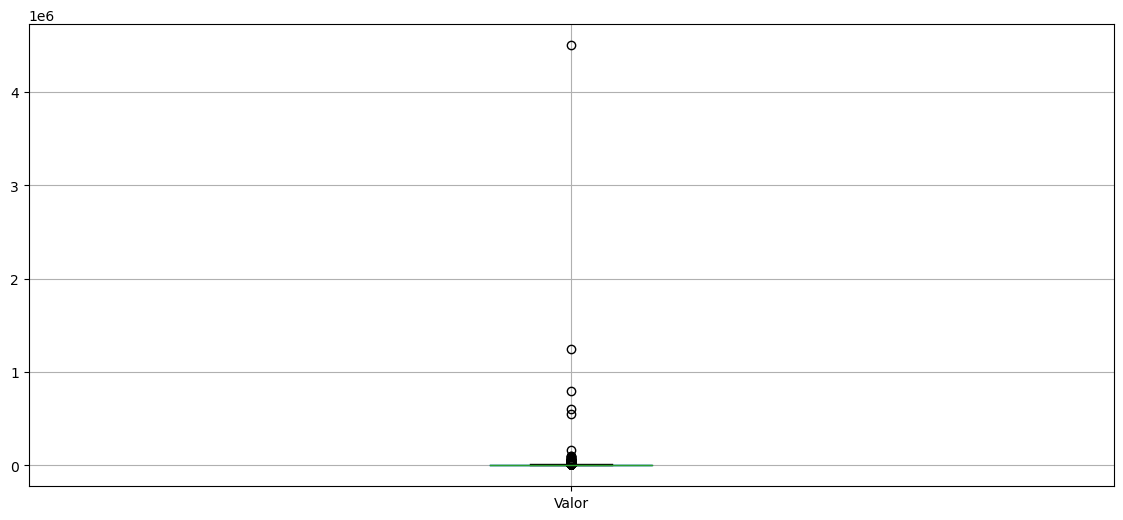

In [66]:
dados.boxplot(['Valor'])

In [67]:
dados[dados['Valor'] >= 500000] # Visualizando outliers que atrapalham a analise do boxplot

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7615,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10565,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12529,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13687,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15302,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [68]:
valor = dados['Valor'] # integrando o valor a uma variável

In [69]:
Q1 = valor.quantile(.25)  # Atribuindo os valores abaixo de 25%
Q3 = valor.quantile(.75)  # Atribuindo os valores acima de 75%
IIQ = Q3 - Q1 # A diferença
limite_inferior = Q1 - 1.5 * IIQ # Conta para ver os limites inferiores
limite_superior = Q3 + 1.5 * IIQ # Conta para ver os limites superiores

In [70]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior) # Selecionando 
dados_new = dados[selecao] # Atribuindo os valores a uma variável

<Axes: >

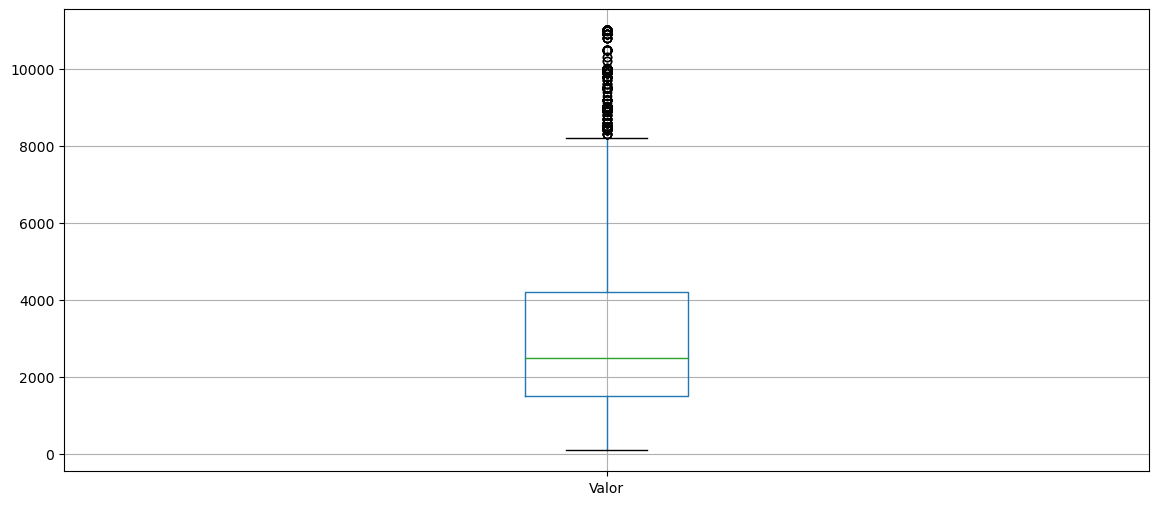

In [71]:
dados_new.boxplot(['Valor']) # Criando boxplot melhorado

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

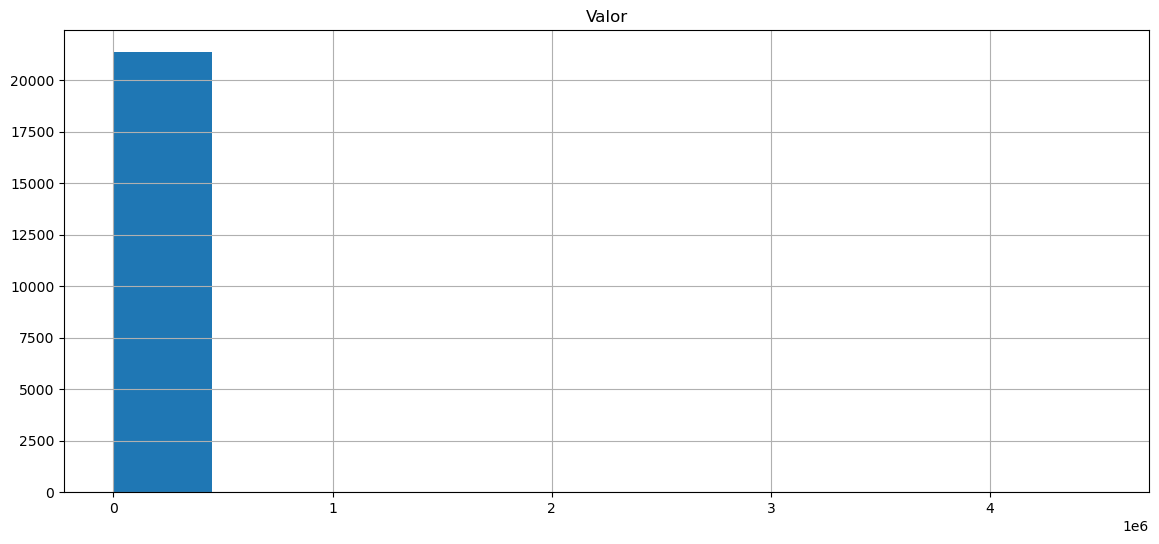

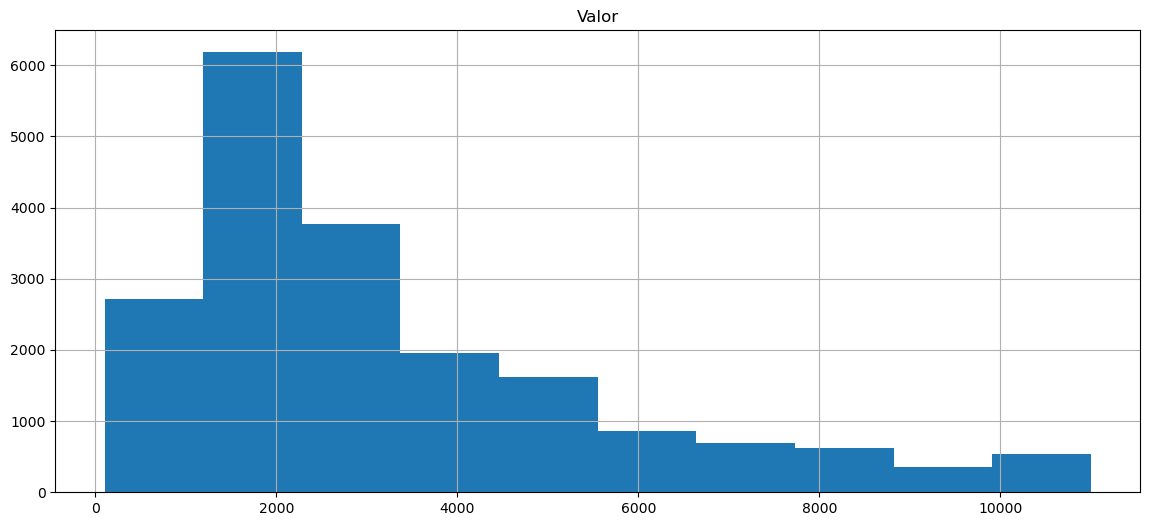

In [72]:
dados.hist(['Valor']) # Histograma anterior
dados_new.hist(['Valor']) # Histograma novo

# Fazer a remoção de outliers é fundamental para tirar os melhores insigths 

## Atividade 

In [73]:
dados_ex = pd.read_csv('dados/aluguel_amostra.csv', sep=';')
dados_ex

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


In [74]:
valor = dados_ex['Valor m2']
 
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

print(Q1)
print(Q3)
print(IIQ)
print(limite_inferior)
print(limite_superior)

21.25
42.31
21.060000000000002
-10.340000000000003
73.9


## Identificando e removendo outliers (Continuação)

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

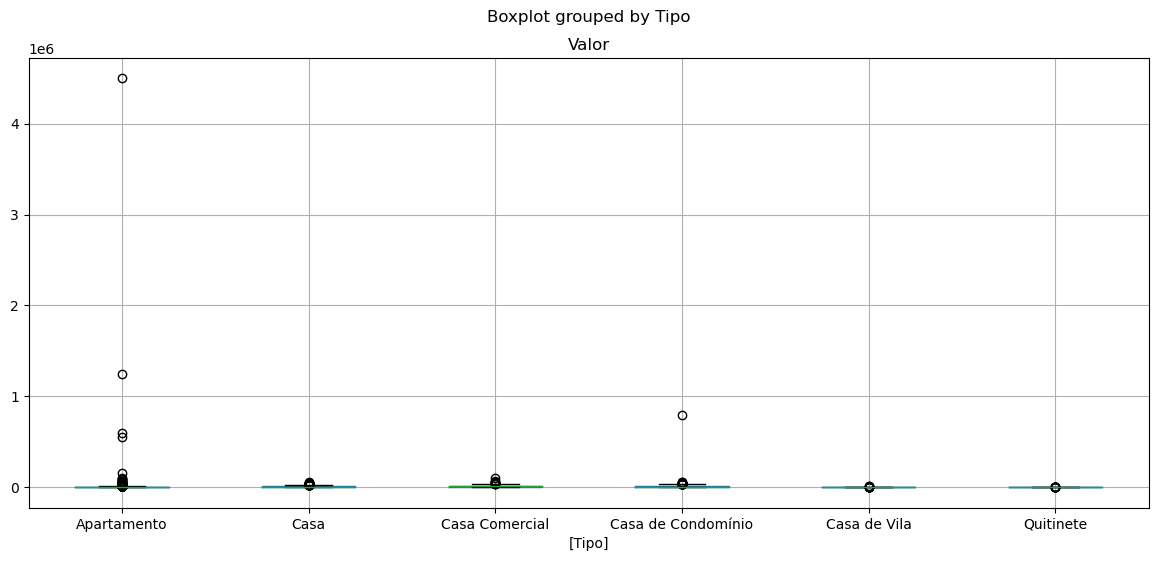

In [75]:
dados.boxplot(['Valor'], by=['Tipo'])

In [76]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [77]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [78]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 80, 81, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, ...], 'Casa': [1, 22, 54, 57, 97, 101, 146, 162, 182, 240, 252, 255, 266, 288, 312, 318, 337, 342, 360, 381, 388, 402, 427, 437, 478, 479, 485, 516, 547, 548, 573, 578, 579, 625, 629, 638, 643, 644, 669, 685, 709, 730, 733, 770, 780, 790, 867, 883, 950, 996, 1042, 1049, 1132, 1137, 1139, 1170, 1191, 1262, 1269, 1329, 1348, 1363, 1384, 1427, 1440, 1444, 1455, 1460, 1487, 1490, 1503, 1602, 1620, 1671, 1677, 1681, 1686, 1699, 1724, 1732, 1777, 1826, 1851, 1891, 1921, 1949, 1958, 1977, 2036, 2054, 2071, 2090, 2116, 2122, 2123, 2148, 2185, 2216, 2219, 2226, ...], 'Casa

In [79]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [80]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa Comercial        6000.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [81]:
Q3

Tipo
Apartamento            5000.0
Casa                   9895.0
Casa Comercial        18000.0
Casa de Condomínio    15500.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [82]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8795.0
Casa Comercial        12000.0
Casa de Condomínio    11500.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [83]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -12092.5
Casa Comercial       -12000.0
Casa de Condomínio   -13250.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [84]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  23087.5
Casa Comercial        36000.0
Casa de Condomínio    32750.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [85]:
limite_superior['Casa']

23087.5

<img src="compressed_box-plot.png" width=70%>

In [88]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

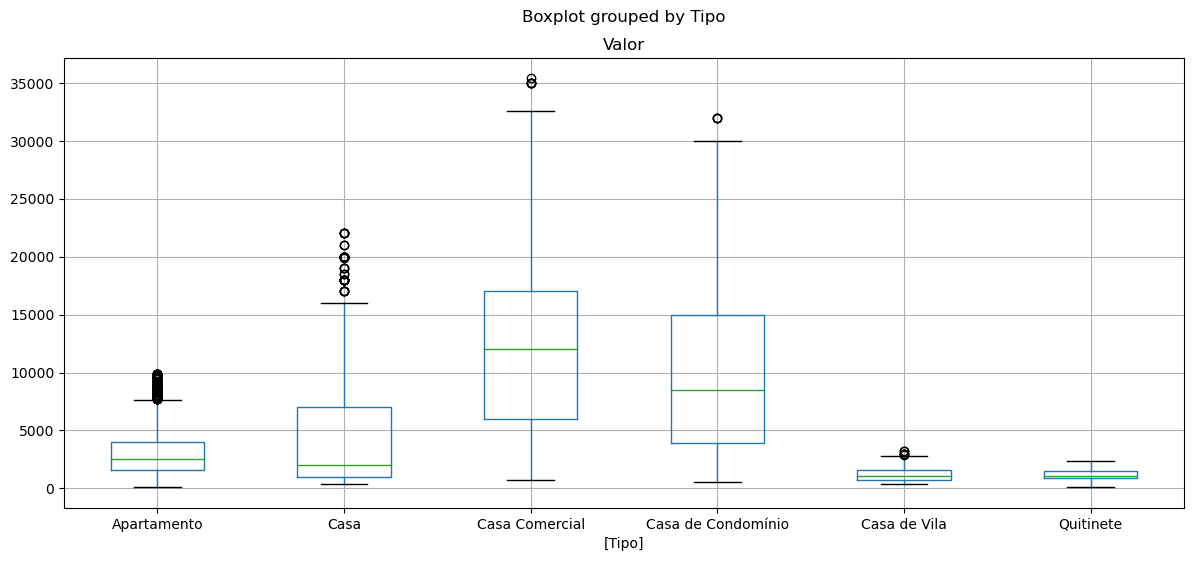

In [89]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [92]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)